In [1]:
#Importing the needed packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import rankdata

import random
import time
import os
import math
import copy
import pickle

# Null Handling
gross_bookings_usd: 97% <br/>
srch_query_affinity_score: 94%  <br/>
orig_destination_distance: 32% #juul fixt deze <br/>
prop_location_score2: 22% #replaced by mean <br/>
prop_location_score1: 0% <br/>
visitor_hist_adr_usd: 95% <br/>
visitor_hist_starrating: 95% full corr. <br/>
prop_review_score: 0.1%

In [4]:
#loading the data
#expedia_df = pd.read_csv('training_set_VU_DM_2014.csv')
test_df = pd.read_csv('test_set_VU_DM_2014.csv')
test_kg = pd.read_csv('test.csv')

In [2]:
def sample_by_query(data, N):
    s = time.time()
    ids = data.srch_id.unique()
    selection = np.random.choice(ids,N,replace=False)
    result = data.loc[data['srch_id'].isin(selection)]
    print('{0:.2f}% of total data sampled (n = {1:})'.format(result.shape[0]*100/data.shape[0], result.shape[0]))
    print('{0:.2f}% of queries sampled'.format(N*100/len(ids)))
    print('Sampling took {} seconds'.format(time.time()-s))
    return result

#data = sample_by_query(expedia_df, 1000)
#data2 = add_price_order(data)
#data = pp_time(data)


In [10]:
display(test_df.loc[test_df['srch_id'] ==3])
display(test_kg.loc[test_kg['srch_id'] ==3])

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
29,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,6533,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
30,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,11425,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
31,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,22325,2,2.0,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,10.0
32,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,24915,2,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
33,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,27753,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
34,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,32382,3,4.5,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0
35,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,43133,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
36,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,43362,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
37,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,45550,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
38,3,2013-01-14 10:11:09,5,219,NaN,NaN,219,46861,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,11.0


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
13,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,4610,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
14,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,5541,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
15,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,9253,5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
16,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,12248,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
17,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,17817,2,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
18,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,19731,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0
19,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,24996,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
20,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,27317,2,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,35245,4,4.0,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
22,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,36029,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [46]:
display(data.shape)
display(data2.shape)
def join(*datasets):
    def diff(a,b):
        b = set(b)
        return [x for x in a if x not in b]
    
    base = copy.deepcopy(datasets[0])
    base_keys = list(base.keys())
    for d in datasets[1:]:
        dif = diff(list(d.keys()),base_keys)
        for k in dif:
            print(k)
            base[k] = d.loc[:][k]
    return base


bla = join(data,data2)


(24544, 58)

(24544, 55)

price_rank


In [52]:
import pickle
with open('tfinal_dataset.pickle','rb') as f:
    dataset = pickle.load(f)
display(dataset[['prop_norm_score1','prop_norm_review','prop_norm_score2','prop_norm_star']])

,prop_norm_score1,prop_norm_review,prop_norm_score2,prop_norm_star
4854,0.0,1.0,1.000000,1.0
4855,1.0,1.0,1.000000,1.0
4856,1.0,1.0,1.000000,1.0
4857,1.0,1.0,1.000000,1.0
4858,1.0,1.0,1.000000,1.0
4859,1.0,1.0,1.000000,1.0
4860,1.0,1.0,1.000000,1.0
4861,1.0,1.0,1.000000,1.0
4862,1.0,1.0,1.000000,1.0
4863,1.0,1.0,1.000000,1.0


In [49]:
data2.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,price_rank
9186,643,2013-01-04 20:54:25,15,55,NaN,NaN,15,1332,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1.0
9187,643,2013-01-04 20:54:25,15,55,NaN,NaN,15,6565,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,9.0
9188,643,2013-01-04 20:54:25,15,55,NaN,NaN,15,12064,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,3.0
9189,643,2013-01-04 20:54:25,15,55,NaN,NaN,15,18083,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2.0
9190,643,2013-01-04 20:54:25,15,55,NaN,NaN,15,23522,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,12.0


In [8]:
def pp_time(input_data):
    data = copy.deepcopy(input_data)
    data["date_time"] = pd.to_datetime(data["date_time"])
    data["year"] = data["date_time"].dt.year
    data["month"] = data["date_time"].dt.month
    data["day"] = data["date_time"].dt.day
    data["hour"]= data["date_time"].dt.hour
    return data

def join_comps(input_data):
    data = copy.deepcopy(input_data)
    s = time.time()
    def remove_comp_outliers(data, *variables):
        # Removes outliers from the percent_diff set. Only high-end outliers are removed
        for var in variables:
            median = data[var].median()
            quantile = data[var].quantile(0.9)
            thresh = median + (1.5*(quantile-median))
            removed_outliers = []
            for i,point in enumerate(data[var].values):
                if not math.isnan(point):
                    if point > thresh:
                        removed_outliers.append(median)
                    else:
                        removed_outliers.append(point)
                else:
                    removed_outliers.append(median)
            data.drop(labels=[var],axis="columns",inplace=True)
            data[var] = removed_outliers
        return data
    
    def combine_comps(data, comp_vars):
        def non_null(array):
            # Returns all values in array that aren't NaN. 
            # If all NaN then return 0.
            r = [x for x in array if not math.isnan(x)]
            if len(r) == 0:
                return [0]
            else:
                return r

        rate_vars = [x for x in comp_vars if 'rate' in x and 'percent' not in x]
        inv_vars  = [x for x in comp_vars if 'inv'  in x]
        percent_vars = [x for x in comp_vars if 'percent' in x]
        comp_rate = np.zeros((len(data)))
        comp_inv = np.zeros((len(data)))
        comp_diff = np.zeros((len(data)))
        print('Combining rate and inv features,')
        s = time.time()
        ts = []
        part_i = int(len(data)/5)
        for i, (idx,row) in enumerate(data.iterrows()):
            rates = row[rate_vars].values
            invs = row[inv_vars].values
            percents = row[percent_vars].values
            comp_rate[i] =  np.mean(non_null(rates))
            comp_inv[i] = np.mean(non_null(invs))
            comp_diff[i] = np.mean(non_null(rates*percents))
            #print(comp_diff[i])
            
            if math.isnan(np.mean(non_null(rates*percents))):
                print(rates)
                print(percents)
                print(rates*percents)
                print(non_null(rates*percents))
                print(np.mean(non_null(rates*percents)))
            if i != 0 and i%part_i == 0:
                print('{}/{}.'.format(i, len(data)))
        
        data['comp_rate'] = comp_rate
        data['comp_inv'] = comp_inv
        data['comp_diff'] = comp_diff
       
        return data
    comp_vars = ['comp1_rate','comp1_inv','comp1_rate_percent_diff',
                'comp2_rate','comp2_inv','comp2_rate_percent_diff',
                'comp3_rate','comp3_inv','comp3_rate_percent_diff',
                'comp4_rate','comp4_inv','comp4_rate_percent_diff',
                'comp5_rate','comp5_inv','comp5_rate_percent_diff',
                'comp6_rate','comp6_inv','comp6_rate_percent_diff',
                'comp7_rate','comp7_inv','comp7_rate_percent_diff',
                'comp8_rate','comp8_inv','comp8_rate_percent_diff']
    data = combine_comps(data,comp_vars)
    data = remove_comp_outliers(data, 'comp_diff')
    #data.drop(comp_vars,axis=1)
    print('Joining Comps took {} minutes'.format((time.time()-s)/60))
    return data

def fill_orig_dest(data_in):
    data = copy.deepcopy(data_in)
    # Fills orig_destination_distance with a replacement in the following order:
    # - first try the average over other prop_country_id (DEST) -> visitor_location_country_id (SRC) pairs
    # - if this is nan: take average over inverse orig_destination_distance (where prop_id is SRC and vice versa)
    # - if this is also nan, simply replace with mean value over distances to target destination.
    s = time.time()
    # Build distance matrix
    print('Filling nan in orig_destination_distance')
    dest_ids = data.prop_country_id.unique()
    src_ids = data.visitor_location_country_id.unique()
    M = np.zeros((len(dest_ids),len(src_ids)))
    d_d = {v:i for i,v in enumerate(dest_ids)}
    s_d = {v:i for i,v in enumerate(src_ids)}
    for i,dest_id in enumerate(dest_ids):
        if i%10 == 0:
            print('{}/{}'.format(i, len(dest_ids)))
        for j,src_id in enumerate(src_ids):
            bla = data.loc[(data['prop_country_id'] == dest_id) & (data['visitor_location_country_id'] == src_id)]
            bla2 = data.loc[(data['prop_country_id'] == src_id) & (data['visitor_location_country_id'] == dest_id)]
            mean_dist = np.mean(bla['orig_destination_distance'])
            if math.isnan(mean_dist):
                mean_dist = np.mean(bla2['orig_destination_distance'])
            M[i,j] = mean_dist
    print('Done building dist matrix in {} seconds'.format(time.time()-s))
    
    # Building dict of average distance over property countries
    def mean_dist(data, prop_country_id):
        return np.mean(data.loc[data['prop_country_id'] == prop_country_id]['orig_destination_distance'])
    st = time.time()
    last_mean_dict = {d:mean_dist(data,d) for d in dest_ids}
    print('Building mean dict took {} seconds'.format(time.time()-st))
    for i,row in data.iterrows():
        src = row['visitor_location_country_id']
        dest = row['prop_country_id']
        if math.isnan(row['orig_destination_distance']):
            inferred = M[d_d[dest],s_d[src]]
            if math.isnan(inferred):
                data.at[i,'orig_destination_distance'] = last_mean_dict[dest]
            else:
                data.at[i,'orig_destination_distance'] = inferred
    t = time.time()-s
    print('Done filling distance nans in {} secs. aka {} mins'.format(t, t/60))
    return data

def fill_nan_with(input_data, variable, filling):
    data = copy.deepcopy(input_data)
    data.loc[pd.isnull(data[variable]),variable] = filling
    return data

def add_price_order(input_data):
    # Sorts price per query from 1 (lowest price) to n. Average ranking used
    s = time.time()
    data = copy.deepcopy(input_data)
    data['price_rank'] = np.zeros((len(data)))
    srch_ids = data.srch_id.unique()
    part_i = int(len(data)/5)
    for i,srch_id in enumerate(srch_ids):
        srch_data = data.loc[data['srch_id'] == srch_id]
        price_sort = rankdata(np.array(srch_data['price_usd']))
        idxs = srch_data.index
        data.loc[idxs,'price_rank'] = price_sort
        if i%part_i == 0:
            print('{}/{}'.format(i, len(srch_ids)))
    print('Adding price rank took {} seconds'.format(time.time()-s))
    return data

def add_price_difference(input_data):
    # Converts prop_log_hist to actual price (inverse log) and divides current
    # price by that result. A value under 1 signifies how much lower the price is
    # with respect to earlier prices.
    s = time.time()
    data = copy.deepcopy(input_data)
    data['price_diff'] = data['price_usd']/(np.e**data['prop_log_historical_price'])
    print('Adding price diff took {} seconds'.format(time.time()-s))
    return data

def normalize_by(input_data, target, by, name):
    s = time.time()
    data = copy.deepcopy(input_data)
    data[name] = np.zeros((len(data)))
    ids = data[by].unique()
    part_i = int(len(data)/5)
    for i, id_ in enumerate(ids):
        by_data = data.loc[data[by] == id_]
        idxs = by_data.index
        mean = np.mean(by_data[target])
        if mean ==0:
            mean = 1e-5
        data.loc[idxs,name] = by_data[target]/mean
        if i%part_i == 0:
            print('{}/{}'.format(i, len(ids)))
    print('Adding {} took {} seconds'.format(name,time.time()-s))
    return data

def fill_location_score2(input_data):
    def train_loc(data,train_vars):
        # Trains a simple linear regression model on the three variables below
        # in order to predict prop_location_score2, it its missing.
        train = data.loc[pd.notnull(data['prop_location_score2'])]
        #test = data.loc[pd.isnull(data['prop_location_score2'])]
        X = train[train_vars].values
        Y = train['prop_location_score2'].values
        regression_model = linear_model.LinearRegression()
        regression_model.fit(X,Y)
        return regression_model
    s = time.time()
    data = copy.deepcopy(input_data)
    # Features to predict score2 on
    X_vars = ['prop_location_score1','prop_starrating','prop_review_score']
    loc2_model = train_loc(data,X_vars)
    nan_scores = data.loc[pd.isnull(data['prop_location_score2'])]
    part_i = len(nan_scores)/5
    data.loc[pd.isnull(data['prop_location_score2']),'prop_location_score2'] = loc2_model.predict(nan_scores[X_vars].values)
    print('Predicting missing location score 2 values took {} seconds'.format(time.time()-s))
    return data

def normalize(data):
    data = normalize_by(data,'orig_destination_distance','srch_id','srch_norm_distance')
    data = normalize_by(data,'orig_destination_distance','srch_destination_id','dest_norm_distance')
    data = normalize_by(data,'orig_destination_distance','prop_id','prop_norm_distance')
    data = normalize_by(data,'price_usd','srch_booking_window','window_norm_price')
    data = normalize_by(data, 'price_usd','prop_id','prop_norm_price')
    data = normalize_by(data, 'price_usd','srch_id','srch_norm_price')
    data = normalize_by(data, 'price_usd', 'srch_destination_id','dest_norm_price')
    data = normalize_by(data, 'prop_location_score1','prop_id','prop_norm_score1')
    data = normalize_by(data, 'prop_location_score1','srch_norm_price','srch_norm_score1')
    data = normalize_by(data, 'prop_location_score1','srch_destination_id','dest_norm_score1')
    data = normalize_by(data, 'prop_location_score2','prop_id','prop_norm_score2')
    data = normalize_by(data, 'prop_location_score2','srch_norm_price','srch_norm_score2')
    data = normalize_by(data, 'prop_location_score2','srch_destination_id','dest_norm_score2')
    data = normalize_by(data, 'prop_review_score','prop_id','prop_norm_review')
    data = normalize_by(data, 'prop_review_score','srch_norm_price','srch_norm_review')
    data = normalize_by(data, 'prop_review_score','srch_destination_id','dest_norm_review')
    data = normalize_by(data, 'prop_starrating','prop_id','prop_norm_star')
    data = normalize_by(data, 'prop_starrating','srch_norm_price','srch_norm_star')
    data = normalize_by(data, 'prop_starrating','srch_destination_id','dest_norm_star')
    return data
    
    
# TODO:
# 1. Julian: Fix price (can be per night or per stay): differs per COUNTRY (either prop or src sure)
# --> we dont do this, as prices are always in the same range. per query
# 2. Julian: Do orig_destination_distance(DONE) & prop_location_score2 (correlation with loc1 and starrating)
# 3. Julian: (after 1) Add price difference over history price_usd / e^prop_log_hist_price
# 4. Normalize prop_starrating * prop_review_score over properties in query
# 5. Normalize prop_starrating * prop_review_score over 
# 6. Replace null values with median (not sure for which) method change_null not implemened
# Maybe: balance training set positive & negative

In [23]:
def preprocess(data):
    s = time.time()
    data = pp_time(data)
    data = join_comps(data)
    data = fill_nan_with(data,'srch_query_affinity_score',0)
    data = fill_nan_with(data,'prop_review_score',-1)
    data = fill_nan_with(data,'visitor_hist_adr_usd',-1)
    data = fill_nan_with(data,'visitor_hist_starrating',-1)
    data = fill_orig_dest(data)
    data = fill_location_score2(data)
    data = add_price_difference(data)
    data = add_price_order(data)
    # Normalize by srch_id, prop_id, srch_destination_id
    data = normalize(data)
    t = time.time()-s
    print("PREPROCESSING TOOK {} SECONDS/ {} MINUTES".format(t, t/60))
    return data
preproc_data = preprocess(data)


Combining rate and inv features,
4897/24489.
9794/24489.
14691/24489.
19588/24489.
24485/24489.
Joining Comps took 0.5700475811958313 minutes
Filling nan in orig_destination_distance
0/74
10/74
20/74
30/74
40/74
50/74
60/74
70/74
Done building dist matrix in 7.144498109817505 seconds
Building mean dict took 0.07378625869750977 seconds
Done filling distance nans in 9.393437147140503 secs. aka 0.15655728578567504 mins
Predicting missing location score 2 values took 0.03109145164489746 seconds
Adding price diff took 0.012475252151489258 seconds
0/1000
Adding price rank took 1.5694208145141602 seconds
0/1000
Adding srch_norm_distance took 1.462829828262329 seconds
0/742
Adding dest_norm_distance took 1.1525750160217285 seconds
0/17442
4897/17442
9794/17442
14691/17442
Adding prop_norm_distance took 23.41519832611084 seconds
0/165
Adding window_norm_price took 0.3708059787750244 seconds
0/17442
4897/17442
9794/17442
14691/17442
Adding prop_norm_price took 23.387852430343628 seconds
0/1000
A

In [3]:
with open('./sets/train_dataset.pickle','rb') as f:
    data = pickle.load(f)


In [11]:
sample_data = sample_by_query(data,50000)

24.99% of total data sampled (n = 1238845)
25.03% of queries sampled
Sampling took 0.7166798114776611 seconds


In [8]:
feature_list = ["srch_id",
"site_id",
"visitor_location_country_id",
"visitor_hist_starrating",
"visitor_hist_adr_usd",
"prop_country_id",
"prop_id",
"prop_starrating",
"prop_review_score",
"prop_brand_bool",
"prop_location_score1",
"prop_location_score2",
"prop_log_historical_price",
"price_usd",
"promotion_flag",
"srch_destination_id",
"srch_length_of_stay",
"srch_booking_window",
"srch_adults_count",
"srch_children_count",
"srch_room_count",
"srch_saturday_night_bool",
"srch_query_affinity_score",
"orig_destination_distance",
"click_bool",
"booking_bool",
"year",
"month",
"day",
"hour",
"comp_rate",
"comp_inv",
"comp_diff",
"price_diff",
"price_rank",
"srch_norm_distance",
"dest_norm_distance",
"window_norm_price",
"prop_norm_price",
"srch_norm_price",
"dest_norm_price",
"srch_norm_score1",
"dest_norm_score1",
"srch_norm_score2",
"dest_norm_score2",
"srch_norm_review",
"dest_norm_review",
"srch_norm_star",
"dest_norm_star"]

train_feat_list = ["srch_id",
"site_id",
"visitor_location_country_id",
"visitor_hist_starrating",
"visitor_hist_adr_usd",
"prop_country_id",
"prop_id",
"prop_starrating",
"prop_review_score",
"prop_brand_bool",
"prop_location_score1",
"prop_location_score2",
"prop_log_historical_price",
"price_usd",
"promotion_flag",
"srch_destination_id",
"srch_length_of_stay",
"srch_booking_window",
"srch_adults_count",
"srch_children_count",
"srch_room_count",
"srch_saturday_night_bool",
"srch_query_affinity_score",
"orig_destination_distance",
"year",
"month",
"day",
"hour",
"comp_rate",
"comp_inv",
"comp_diff",
"price_diff",
"price_rank",
"srch_norm_distance",
"dest_norm_distance",
"window_norm_price",
"prop_norm_price",
"srch_norm_price",
"dest_norm_price",
"srch_norm_score1",
"dest_norm_score1",
"srch_norm_score2",
"dest_norm_score2",
"srch_norm_review",
"dest_norm_review",
"srch_norm_star",
"dest_norm_star"]

print([x for x in train_feat_list if x not in feature_list])

[]


In [ ]:
# LOGISTIC REGRESSION ON CLICK BOOLEAN
def fill_nan_with(input_data, variable, filling):
    #data = copy.deepcopy(input_data)
    data = input_data
    data.loc[pd.isnull(data[variable]),variable] = filling
    return data

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

X = sample_data[train_feat_list]
for key in X.keys():
    print(key,type(X[key].values[0]))
    if sum(pd.isnull(X[key])):
        X = fill_nan_with(data, key, 0)
Y = sample_data['click_bool']

m = LogisticRegression()
m.fit(X.values/np.std(X.values,0),Y)
#print(m.coef_)
importances = m.coef_[0]
cfs = importances[np.argsort(np.abs(importances))]
idx = np.argsort(np.abs(importances))[::-1]
result_dict= {}
for i,key in enumerate(X.keys()[np.argsort(np.abs(importances))]):
    #print(key,cfs[i])
    result_dict[key] = cfs[i]
print(result_dict)
plt.figure(figsize=(20,10))
plt.title("Feature coefficients for predicting click_bool")
plt.bar(range(X.shape[1]), importances[idx],
       color="y", align="center")
plt.xticks(range(X.shape[1]), np.array(train_feat_list)[idx])
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

srch_id <class 'numpy.int64'>
site_id <class 'numpy.int64'>
visitor_location_country_id <class 'numpy.int64'>
visitor_hist_starrating <class 'numpy.float64'>
visitor_hist_adr_usd <class 'numpy.float64'>
prop_country_id <class 'numpy.int64'>
prop_id <class 'numpy.int64'>
prop_starrating <class 'numpy.int64'>
prop_review_score <class 'numpy.float64'>
prop_brand_bool <class 'numpy.int64'>
prop_location_score1 <class 'numpy.float64'>
prop_location_score2 <class 'numpy.float64'>
prop_log_historical_price <class 'numpy.float64'>
price_usd <class 'numpy.float64'>
promotion_flag <class 'numpy.int64'>
srch_destination_id <class 'numpy.int64'>
srch_length_of_stay <class 'numpy.int64'>
srch_booking_window <class 'numpy.int64'>
srch_adults_count <class 'numpy.int64'>
srch_children_count <class 'numpy.int64'>
srch_room_count <class 'numpy.int64'>
srch_saturday_night_bool <class 'numpy.int64'>
srch_query_affinity_score <class 'numpy.float64'>
orig_destination_distance <class 'numpy.float64'>
year <c

# TOP 15
comp_rate 0.0470002749183205 <br/>
prop_brand_bool 0.05440478129102235<br/>
prop_review_score 0.0660943057751445<br/>
dest_norm_score2 0.0962347963983144<br/>
dest_norm_score1 -0.09901383699756099<br/>
srch_norm_score1 0.10021151051051454<br/>
promotion_flag 0.1106733771557951<br/>
prop_starrating 0.11133505172225888<br/>
srch_norm_review 0.11189810822036883<br/>
prop_location_score1 -0.11631520409818645<br/>
prop_location_score2 0.13423867278372<br/>>
dest_norm_star 0.1489297937826<br/>
srch_norm_star 0.17785965053877253<br/>
srch_norm_score2 0.214586992250735<br/>
price_rank -0.607130990621568<br/>


In [40]:
name2id = {feat:(i+1) for i,feat in enumerate(train_feat_list)}


In [3]:
def create_train_file(data, name, features):
    # This method converts the dataset to a txt format on which 
    # LambdaMART can be trained according to LEMUR file specification
    # data: dataset
    # name: name of train file
    # features: list of feature names.
    def get_negative_count(data, srch_id):
        d = data.loc[data['srch_id'] == srch_id]
        n_negative = sum(d['click_bool'] == 0)
        #target_n = sum(d['click_bool'] == 1)
        return n_negative
    
    s = time.time()
    srch_ids = data.srch_id.unique()
    neg_dict = {i:get_negative_count(data,i) for i in srch_ids}
    neg_count_dict= defaultdict(lambda:0)
        
    def is_numerical(val):
        if type(val) == float or type(val) == int:
            return True
        else:
            for el in val:
                if el != '.':
                    if not el.isdigit():
                        return False
        return True
    
            
    def feat_to_line(target, srch_id, feat_dict):
        line = '{} qid:{} '.format(target, srch_id)
        for (k,v) in list(feat_dict.items()):
            assert is_numerical(v), 'non numerical value detected: {}'.format(v)
            if math.isnan(v):
                v = 0
            line += '{}:{} '.format(k,v)
        return line
    f = open(name+'_train.txt','w')
    for i, row in data.iterrows():
        srch_id = row['srch_id']
        # Negative sampling
        is_neg = (row['click_bool'] == 0)
        if is_neg:
            n_neg = neg_dict[srch_id]
            if np.random.rand(1)[0] > (1/n_neg):
                continue
        if is_neg:
            neg_count_dict[srch_id] += 1
        target = max(np.array((row['booking_bool'],row['click_bool']))*[5,1])
        feat_dict = {k+1:row[name] for k,name in enumerate(features)}
        line = feat_to_line(target,srch_id, feat_dict)
        line+='\n'
        f.write(line)
    f.close()
    print('Writing to file took {} seconds'.format(time.time()-s))
    return neg_count_dict
        
def sample_by_query(data, N):
    s = time.time()
    ids = data.srch_id.unique()
    selection = np.random.choice(ids,N,replace=False)
    result = data.loc[data['srch_id'].isin(selection)]
    print('{0:.2f}% of total data sampled (n = {1:})'.format(result.shape[0]*100/data.shape[0], result.shape[0]))
    print('{0:.2f}% of queries sampled'.format(N*100/len(ids)))
    print('Sampling took {} seconds'.format(time.time()-s))
    return result

#sampled_data = sample_by_query(expedia_df, 10000)
#sampled_data = preprocess(sampled_data)
#print(sampled_data.keys())

In [132]:
# pls dont edit
var_list = ['site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool','year', 'month']
create_train_file(sampled_data,'try1',var_list)

Writing to file took 67.80575585365295 seconds


In [134]:
sampled_data[var_list]

,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,year,month
207,5,219,219,2863,3,4.0,1,1.95,0.0270,4.51,...,1,0,2,0,1,0,766.18,0,2012,12
208,5,219,219,12255,2,4.5,1,2.40,0.0078,4.75,...,1,0,2,0,1,0,766.53,0,2012,12
209,5,219,219,20707,4,4.0,0,2.20,0.0890,4.87,...,1,0,2,0,1,0,767.40,0,2012,12
210,5,219,219,22710,3,3.5,0,2.20,0.1054,4.40,...,1,0,2,0,1,0,766.48,0,2012,12
211,5,219,219,23228,4,4.0,0,3.26,0.3676,4.44,...,1,0,2,0,1,0,767.86,0,2012,12
212,5,219,219,30829,2,3.5,1,1.39,0.0034,4.22,...,1,0,2,0,1,0,767.03,0,2012,12
213,5,219,219,50684,3,3.5,1,1.61,0.0014,4.85,...,1,0,2,0,1,0,764.04,0,2012,12
214,5,219,219,53298,2,3.5,0,3.14,0.0655,4.54,...,1,0,2,0,1,0,767.92,0,2012,12
215,5,219,219,54036,3,4.5,1,1.79,0.0050,4.87,...,1,0,2,0,1,0,765.87,0,2012,12
216,5,219,219,54226,4,4.0,0,1.79,0.0559,4.76,...,1,0,2,0,1,0,767.26,0,2012,12


In [44]:


feature_list = ["srch_id","site_id","visitor_location_country_id","visitor_hist_starrating","visitor_hist_adr_usd","prop_country_id","prop_id","prop_starrating","prop_review_score","prop_brand_bool","prop_location_score1","prop_location_score2","prop_log_historical_price","price_usd","promotion_flag","srch_destination_id","srch_length_of_stay","srch_booking_window","srch_adults_count","srch_children_count","srch_room_count","srch_saturday_night_bool","srch_query_affinity_score","orig_destination_distance","year","month","day","hour","comp_rate","comp_inv","comp_diff","price_diff","price_rank","srch_norm_distance","dest_norm_distance","window_norm_price","prop_norm_price","srch_norm_price","dest_norm_price","srch_norm_score1","dest_norm_score1","srch_norm_score2","dest_norm_score2","srch_norm_review","dest_norm_review","srch_norm_star","dest_norm_star"]
name2id = {feat:(i+1) for i,feat in enumerate(feature_list)}

In [15]:
print(part1.shape)
print(data.shape)



(2480490, 63)
(2477857, 63)


In [7]:
part2.shape

(2477857, 63)

In [8]:
part1.shape[0] + part2.shape[0]

4958347

DONE


In [9]:
for srch_id in data.srch_id.unique():
    d = data.loc[data['srch_id'] == srch_id]
    print(sum(d['click_bool'] == 1))
    print(sum(d['booking_bool'] == 1))
    print("__")

1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
1
0
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
3
1
__
1
0
__
1
1
__
1
1
__
3
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
2
1
__
1
0
__
1
0
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
2
0
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
0
__
1
0
__
1
1
__
2
0
__
1
0
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
2
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
3
0
__
2
1
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__

1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
2
1
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
0
__
1
0
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
2
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
0
__
2
0
__
1
0
__
2
1
__
1
0
__
3
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
2
1
__
1
1
__
1
0
__
1
1
__
1
0
__
1
0
__
1
1
__
3
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
0
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
2
1
__
2
1
__
1
0
__
1
0
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__

1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
1
__
1
1
__
1
1
__
2
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
0
__
1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
1
__
1
0
__
1
0
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
2
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
2
1
__
1
0
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
0
__
1
1
__
1
0
__
1
0
__
1
1
__
1
1
__
1
0
__
1
1
__
2
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
0
__
3
0
__
1
1
__
2
1
__
1
1
__
1
1
__
1
0
__
2
1
__
1
1
__
1
1
__
1
1
__
1
1
__
15
1
__
1
1
__
2
1
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
1
__
1
1
__
1
0
__
1
1
__
1
0
__
1
1
__
1
1
__
1
1
__
1
0
_

KeyboardInterrupt: 

In [6]:
data.keys()



Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [15]:
import pickle
import os
test = []
train = []
for i in range(46):
    with open('progress/progress/feat_train_score{}.pickle'.format(i+1),'rb') as f:
        d = pickle.load(f)
        train.append(d)
    with open('progress/progress/feat_test_score{}.pickle'.format(i+1),'rb') as f:
        d = pickle.load(f)
        test.append(d)

    


In [16]:
train_l = 0
test_l = 0
for i in range(46):
    if len(train[i]) > train_l:
        train_l = len(train[i])
    if len(test[i]) > test_l:
        test_l = len(test[i])
        

In [17]:
def pad(row,n):
    b = len(row)
    for i in range(n - b):
        row.append(row[-1])
    return row
test = [pad(x,599) for x in test]
train =[pad(x,599) for x in train]

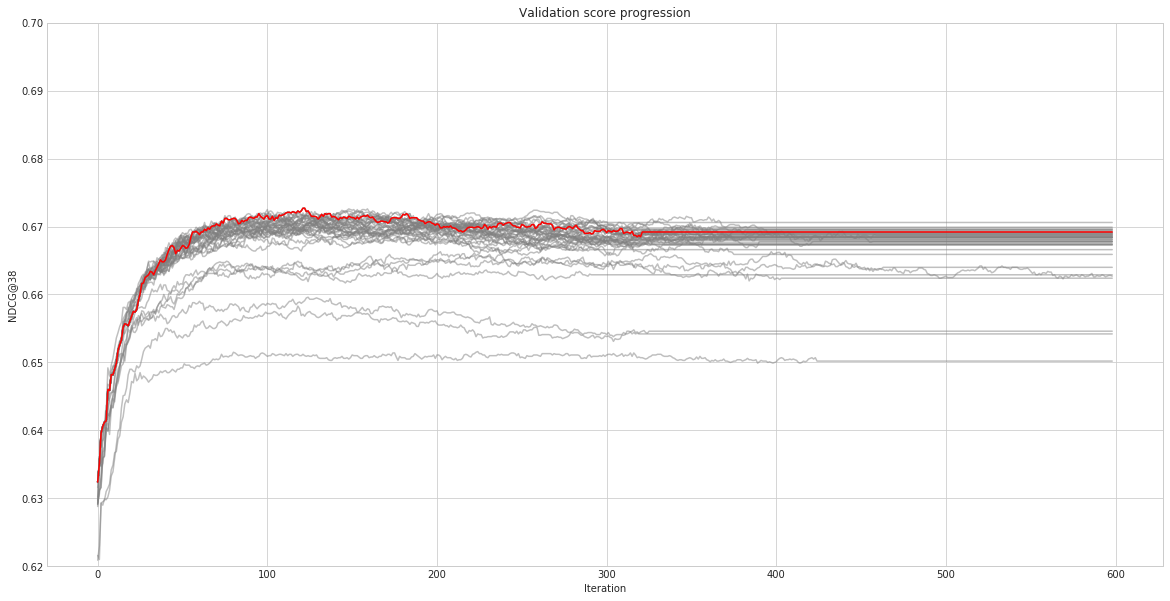

In [33]:
x = np.arange(599)
plt.figure(figsize=(20,10))
plt.title('Validation score progression')
plt.xlabel('Iteration')
plt.ylabel('NDCG@38')
for i,t in enumerate(test):
    #print(t)
    if i == 45:
        plt.plot(x,t,c='r')
    else:
        plt.plot(x,t,c='gray', alpha=0.5)
    #lt.plot(x,train[i],c='r')
plt.ylim(0.62,0.7)

plt.show()

In [37]:
import os
with open('sets/train_dataset.pickle','rb') as f:
    dataset = pickle.load(f)

In [39]:
d = dataset
d.keys()


Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'